# k-means clustering implemented in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs

# k-means clustering algorithm

In [2]:
class KMeans():
    
    def __init__(self, n_cluster = 4):
        self.k = n_cluster
        
        
    def fit(self, data):
        n_sample = data.shape[0]
        
        # Initialize cluster centers
        self.center = np.array(random.sample(list(data), self.k))
        self.initial_center = np.copy(self.center)
        
        # Keep track of the clusters
        old_assign = None
        n_iter = 0
        
        while True:
            new_assign = [self.classify(datapoint) for datapoint in data]
            
            if new_assign == old_assign:
                print(f"Training finished after {n_iter} iterations.")
                return
            
            old_assign = new_assign
            n_iter += 1
            
            # Re-estimate the centers
            for id_ in range(self.k):
                point_idx = np.where(np.array(new_assign) == id_)
                datapoint = data[point_idx]
                self.center[id_] = datapoint.mean(axis = 0)
                
                
    def distance(self, datapoint):
        dists = np.sqrt(np.sum((self.center - datapoint)**2, axis = 1))
        return dists
    
    
    def classify(self, datapoint):
        # Given a datapoint, return the cluster ID of that cluster
        dists = self.distance(datapoint)
        return np.argmin(dists)
    
    
    def plot_cluster(self, data):
        plt.figure(figsize = (12, 10))
        plt.title("Initial centers in black; Final centers in red.")
        plt.scatter(data[:, 0], data[:, 1], marker = '.', alpha = 0.3, c = y)
        plt.scatter(self.center[:, 0], self.center[:, 1], marker = 'x', s = 50, c = 'r')
        plt.scatter(self.initial_center[:, 0], self.initial_center[:, 1], marker = 'x', s = 50, c = 'k')
        plt.show()

## Dataset

Shape of dataset: (1000, 2)


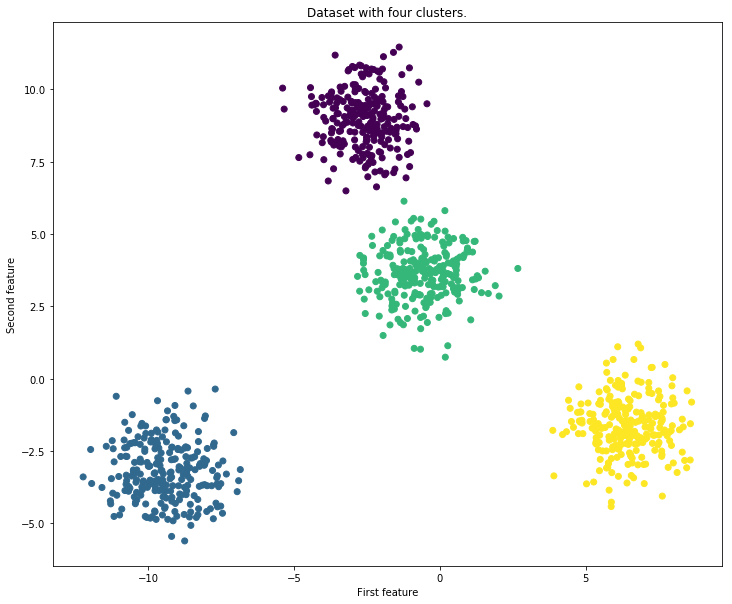

In [3]:
X, y = make_blobs(centers = 4, n_samples = 1000)
print(f"Shape of dataset: {X.shape}")

fig = plt.figure(figsize = (12, 10))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("Dataset with four clusters.")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

## Training and testing

In [4]:
kmeans = KMeans(n_cluster = 4)
kmeans.fit(X)

Training finished after 1 iterations.


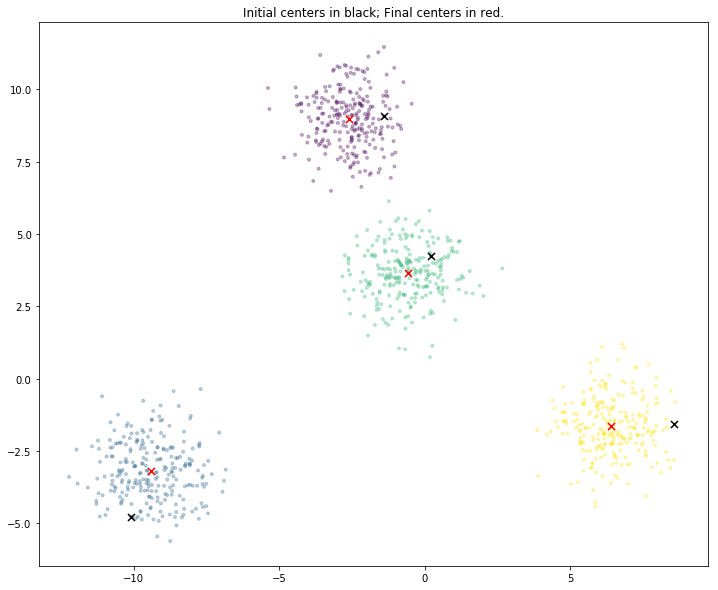

In [5]:
kmeans.plot_cluster(X)